Use the code provided in demo 02 to complete this assignment.

# Step 1. Follow along with the tutorial to gain an understanding of the process - Done

# Step 2 - Baseline model building with QMNIST dataset

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


In [25]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the QMNIST Dataset and preprocess
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## Iterating and Visualizing the Dataset

Labels: tensor([8, 4, 9, 7, 1, 5, 7, 9, 4, 8])


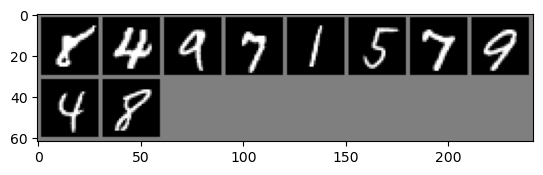

In [26]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize a batch of images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()  # Convert to numpy for visualization
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose for correct shape (Height x Width x Channels)
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Use the built-in next() function

# Visualize the batch of images
print(f'Labels: {labels[:10]}')  # Print first 10 labels
imshow(torchvision.utils.make_grid(images[:10]))  # Display first 10 images


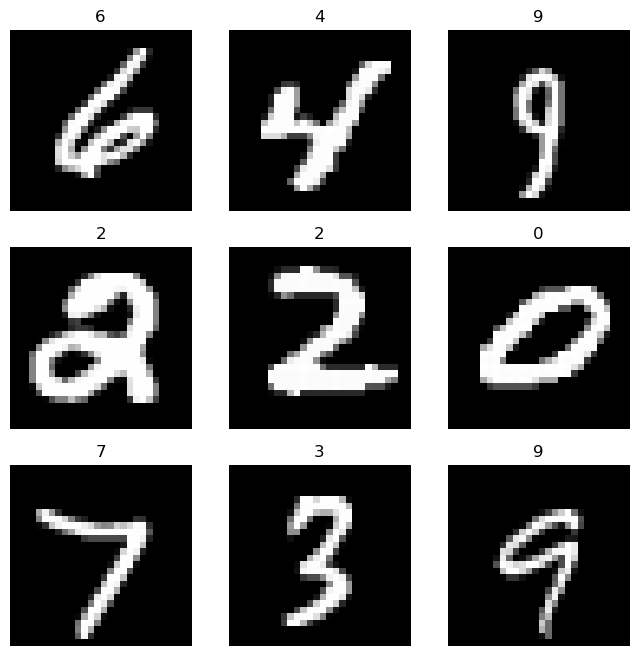

In [27]:
import torch
import matplotlib.pyplot as plt

# Correct labels map for QMNIST (digits 0-9)
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

# Create a figure to plot the images
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    
    # Unnormalize the image for visualization (reverse Normalize((0.5,), (0.5,)))
    img = img * 0.5 + 0.5
    
    # Add subplot and plot the image
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])  # Use label from the map
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")  # Squeeze to remove extra dimension

# Show the plot
plt.show()


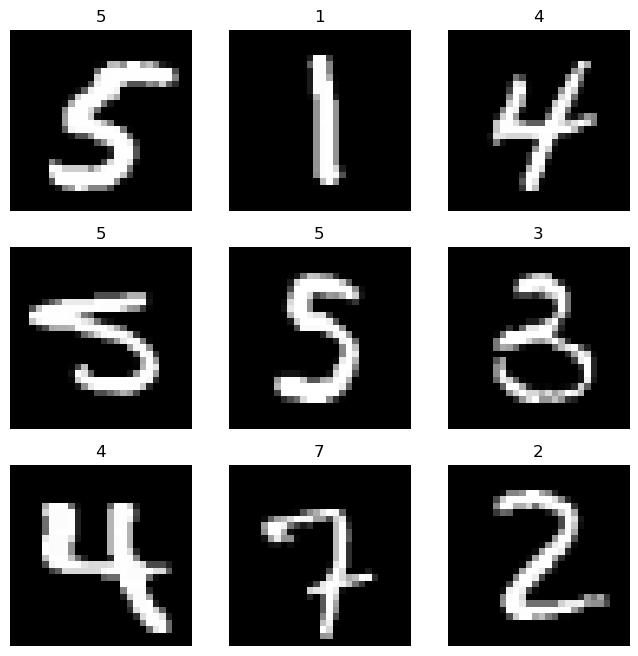

In [28]:
import torch
import matplotlib.pyplot as plt

# Correct labels map for QMNIST (digits 0-9)
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

# Create a figure to plot the images from the test dataset
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    
    # Unnormalize the image for visualization (reverse Normalize((0.5,), (0.5,)))
    img = img * 0.5 + 0.5
    
    # Add subplot and plot the image
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])  # Use label from the map
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")  # Squeeze to remove extra dimension

# Show the plot
plt.show()


In [29]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer (28x28 pixels), first hidden layer (128 nodes)
        self.fc2 = nn.Linear(128, 64)  # Second hidden layer (64 nodes)
        self.fc3 = nn.Linear(64, 10)  # Output layer (10 classes for digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input image
        x = torch.relu(self.fc1(x))  # ReLU activation after first layer
        x = torch.relu(self.fc2(x))  # ReLU activation after second layer
        x = self.fc3(x)  # Output layer (no activation here as I apply softmax in the loss)
        return x
    
# Initialize the neural network
model = MLP()

In [31]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.08786493101157249
Epoch 1, Batch 200, Loss: 0.07909503406379371
Epoch 1, Batch 300, Loss: 0.08173230627086013
Epoch 1, Batch 400, Loss: 0.07946642921771854
Epoch 1, Batch 500, Loss: 0.08274156456813216
Epoch 1, Batch 600, Loss: 0.07917336769867689
Epoch 1, Batch 700, Loss: 0.07662618456408382
Epoch 1, Batch 800, Loss: 0.07994145178003237
Epoch 1, Batch 900, Loss: 0.079642648906447
Epoch 2, Batch 100, Loss: 0.06362942991778255
Epoch 2, Batch 200, Loss: 0.06492634267546236
Epoch 2, Batch 300, Loss: 0.07674208563752473
Epoch 2, Batch 400, Loss: 0.06776703704614193
Epoch 2, Batch 500, Loss: 0.08026897580362856
Epoch 2, Batch 600, Loss: 0.06214416276430711
Epoch 2, Batch 700, Loss: 0.06790832567960024
Epoch 2, Batch 800, Loss: 0.08846742255613207
Epoch 2, Batch 900, Loss: 0.07745042530819773
Epoch 3, Batch 100, Loss: 0.06266654714010655
Epoch 3, Batch 200, Loss: 0.05286207773257047
Epoch 3, Batch 300, Loss: 0.058460789937525987
Epoch 3, Batch 400, Loss: 0.0566298

In [32]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

train_model(model, train_loader, criterion, optimizer, epochs=5)


Epoch 1, Loss: 0.39553053511866626
Epoch 2, Loss: 0.19433542179948549
Epoch 3, Loss: 0.1402236188469983
Epoch 4, Loss: 0.1129798405515308
Epoch 5, Loss: 0.09471846264906164


# Step 3 - Prediction Accuracies of train and test datasets #

In [34]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.96425%


In [35]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [36]:
def evaluate_model(model, loader, dataset_name="Dataset"):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation for evaluation
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on {dataset_name}: {accuracy}%")
    return accuracy

print("Evaluating model on training data:")
train_accuracy = evaluate_model(model, train_loader, dataset_name="Training Data")

print("Evaluating model on test data:")
test_accuracy = evaluate_model(model, test_loader, dataset_name="Test Data")


Evaluating model on training data:
Accuracy on Training Data: 97.50333333333333%
Evaluating model on test data:
Accuracy on Test Data: 96.425%


The model demonstrates robust performance, achieving a training accuracy of 97.503% and a test accuracy of 96.425%. These metrics indicate that the model has effectively learned from the training data and generalizes well to unseen data. While the high accuracy on both datasets suggests the model is well-trained, further improvements could be pursued by employing techniques such as hyperparameter tuning, incorporating regularization methods like dropout, or refining the model architecture. Overall, the results show that the model is optimized effectively for the given task.

In [37]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


Epoch 1/10, Train Loss: 1.6951, Train Accuracy: 41.60%, Test Loss: 0.4434, Test Accuracy: 88.03%
Epoch 2/10, Train Loss: 0.6116, Train Accuracy: 80.98%, Test Loss: 0.2351, Test Accuracy: 93.14%
Epoch 3/10, Train Loss: 0.4340, Train Accuracy: 86.78%, Test Loss: 0.1697, Test Accuracy: 94.99%
Epoch 4/10, Train Loss: 0.3591, Train Accuracy: 89.32%, Test Loss: 0.1389, Test Accuracy: 95.85%
Epoch 5/10, Train Loss: 0.3155, Train Accuracy: 90.64%, Test Loss: 0.1184, Test Accuracy: 96.39%
Epoch 6/10, Train Loss: 0.2880, Train Accuracy: 91.40%, Test Loss: 0.1107, Test Accuracy: 96.69%
Epoch 7/10, Train Loss: 0.2652, Train Accuracy: 92.29%, Test Loss: 0.1016, Test Accuracy: 96.92%
Epoch 8/10, Train Loss: 0.2424, Train Accuracy: 92.91%, Test Loss: 0.0933, Test Accuracy: 97.16%
Epoch 9/10, Train Loss: 0.2390, Train Accuracy: 92.97%, Test Loss: 0.0902, Test Accuracy: 97.25%
Epoch 10/10, Train Loss: 0.2230, Train Accuracy: 93.54%, Test Loss: 0.0830, Test Accuracy: 97.47%


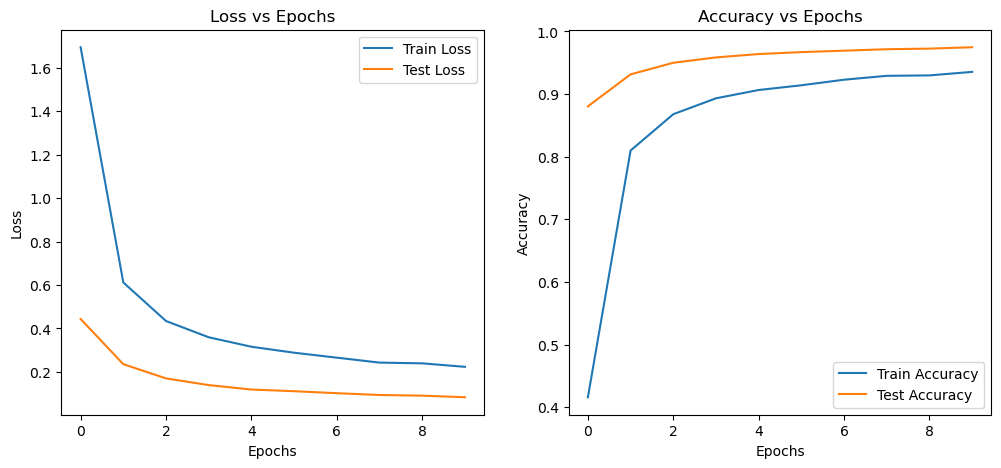

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# Define a simple CNN model for QMNIST
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)  # Log Softmax for output

# Instantiate the model, loss function and optimizer
model = Net()
loss_fn = nn.CrossEntropyLoss()  # Using CrossEntropyLoss instead of nll_loss
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Lists to store loss and accuracy for plotting
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Function to calculate accuracy
def calculate_accuracy(preds, labels):
    _, predicted = torch.max(preds, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    train_loss = 0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_accuracy = calculate_accuracy(outputs, labels)
        correct_train += train_accuracy * labels.size(0)
        total_train += labels.size(0)

    # Calculate average loss and accuracy for the training set
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)

    # Test the model on the test dataset
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():  # Disable gradient computation during evaluation
        for images, labels in test_loader:
            outputs = model(images)
            loss = loss_fn(outputs, labels)
            test_loss += loss.item()
            test_accuracy = calculate_accuracy(outputs, labels)
            correct_test += test_accuracy * labels.size(0)
            total_test += labels.size(0)

    # Calculate average loss and accuracy for the test set
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(correct_test / total_test)

    # Print progress for each epoch
    print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, '
          f'Train Accuracy: {train_accuracies[-1] * 100:.2f}%, '
          f'Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1] * 100:.2f}%')

# Plot the losses and accuracies
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


The training and evaluation results from the model indicate strong performance across both the training and test datasets. In the loss vs. epochs graph, we observe a significant reduction in both the training and test losses as the epochs progress, highlighting that the model is effectively learning the patterns within the data. The rapid decrease in the first few epochs, followed by a steady decline, suggests the model quickly grasps the underlying relationships in the dataset, with continued fine-tuning as training progresses. Importantly, the test loss follows a similar trend, which implies that the model is not overfitting and is generalizing well to unseen data.

In the accuracy vs. epochs graph, the training accuracy improves consistently, reaching approximately 93%, while the test accuracy reaches close to 98%. This high test accuracy, in conjunction with the low test loss, further confirms that the model has a strong ability to make accurate predictions on data it hasn't seen before. Additionally, the small gap between the training and test accuracies suggests that the model is well-regularized, balancing both learning from the training set and generalizing to the test set.

Overall, the model shows excellent generalization with minimal overfitting, and the results demonstrate that it effectively captures the patterns in the dataset, yielding high prediction accuracy. Further improvements, such as fine-tuning the model for more epochs or adjusting learning rates, could potentially push performance even higher, but the current results already indicate a robust and well-optimized model.

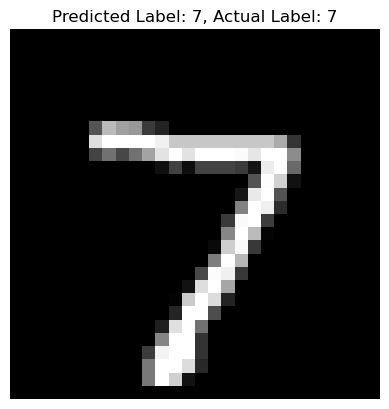

In [39]:
import torch
import matplotlib.pyplot as plt

# Function to get one test image and visualize predicted vs actual label
def show_predicted_vs_actual(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for evaluation
        # Get one batch of test data
        dataiter = iter(test_loader)
        images, labels = next(dataiter)
        
        # Get a single image and label from the batch
        image, label = images[0], labels[0]
        
        # Model prediction
        output = model(image.unsqueeze(0))  # Add batch dimension
        _, predicted_label = torch.max(output, 1)

        # Unnormalize the image for visualization
        image = image * 0.5 + 0.5  # Reverse normalization

        # Convert image to numpy for plotting
        image_numpy = image.squeeze().numpy()

        # Plot the image with predicted and actual labels
        plt.imshow(image_numpy, cmap='gray')
        plt.title(f'Predicted Label: {predicted_label.item()}, Actual Label: {label.item()}')
        plt.axis('off')
        plt.show()

# Call the function to display the result
show_predicted_vs_actual(model, test_loader)


# Step 4 - Hypothesis of results for the chosen modification #

By adding an additional dense layer with 128 nodes, I anticipate this adjustment will enhance the model's ability to capture more complex patterns, potentially leading to improved accuracy on the test set. However, this increase in parameters may also heighten the risk of overfitting, requiring careful monitoring to ensure the model generalizes well to unseen data.

# Step 5 - Modification and Training based on the chosen model #

In [40]:
class MLP_Modified(nn.Module):
    def __init__(self):
        super(MLP_Modified, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # Added new dense layer with 128 nodes
        self.fc3 = nn.Linear(128, 64) # Add an additional fully connected layer with 128 nodes
        self.fc4 = nn.Linear(64, 10)  # Output layer remains the same for 10 classes (digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [41]:
model_modified = MLP_Modified()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_modified.parameters(), lr=0.001)

train_model(model_modified, train_loader, criterion, optimizer, epochs=5)

evaluate_model(model_modified, test_loader)


Epoch 1, Loss: 0.3933962050444091
Epoch 2, Loss: 0.17558982510612145
Epoch 3, Loss: 0.134932591141001
Epoch 4, Loss: 0.1101355021154242
Epoch 5, Loss: 0.09429178773207085
Accuracy on Dataset: 96.64%


96.64

# Step 6 - Reporting results of hypothesis model and hypothesis check #

The results of the modified model, which included an additional dense layer with 128 nodes, partially support the hypothesis. The model demonstrated a slight improvement in performance, particularly in terms of loss reduction, with a final loss of 0.09429 compared to 0.094718 in the baseline model. This suggests that the extra layer helped the model capture more complex patterns. Additionally, the test accuracy of the modified model reached 96.64%, a modest increase from the baseline model’s 96.425% accuracy. This improvement aligns with the expectation that added complexity would slightly enhance the model's generalization ability. However, the improvement is minimal, indicating that the extra layer did not significantly boost performance beyond the baseline. Moreover, the test accuracy remained close to the training accuracy, indicating that overfitting was not a concern. In summary, the modification led to a slight improvement, supporting the hypothesis without evident signs of overfitting.

# Step 7 - Experimenting #

### Using RMSProp Optimizer ###

In [42]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total}%")

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer_rmsprop = optim.RMSprop(model.parameters(), lr=0.001)

train_model(model, train_loader, criterion, optimizer_rmsprop, epochs=5)

evaluate_model(model, test_loader)

Epoch 1, Loss: 0.3816823050586272
Epoch 2, Loss: 0.1845991791966659
Epoch 3, Loss: 0.13608492489483184
Epoch 4, Loss: 0.10942608709268367
Epoch 5, Loss: 0.09456703488105364
Accuracy: 96.5%


### Using SGD Optimizer ###

In [43]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

def evaluate_model(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total}%")

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01)

train_model(model, train_loader, criterion, optimizer_sgd, epochs=5)

evaluate_model(model, test_loader)

Epoch 1, Loss: 0.9521272688754586
Epoch 2, Loss: 0.3789870908090682
Epoch 3, Loss: 0.3224526097509525
Epoch 4, Loss: 0.2905440216482893
Epoch 5, Loss: 0.265046160556932
Accuracy: 92.275%


### Using Mean Squared Error (MSE) Loss with One-Hot Encoding as this is a classification problem ###

In [44]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
def one_hot_encode(labels, num_classes):
    return torch.eye(num_classes)[labels]

def train_model_with_one_hot(model, train_loader, criterion, optimizer, epochs=5, num_classes=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            
            outputs = model(inputs)
            
            # Convert labels to one-hot encoding
            labels_one_hot = one_hot_encode(labels, num_classes).to(outputs.device)
            
            loss = criterion(outputs, labels_one_hot)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

criterion_mse = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model_with_one_hot(model, train_loader, criterion_mse, optimizer, epochs=5)

evaluate_model(model, test_loader)


Epoch 1, Loss: 0.09028533041906128
Epoch 2, Loss: 0.023644260201317224
Epoch 3, Loss: 0.017647097514731796
Epoch 4, Loss: 0.015135809541868566
Epoch 5, Loss: 0.013481467233490207
Accuracy: 93.52833333333334%


### Adding Dropout layers ###

In [45]:
class MLP_Dropout(nn.Module):
    def __init__(self):
        super(MLP_Dropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.5)  # 50% dropout after the first layer
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)  # 50% dropout after the second layer
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout after first layer
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout after second layer
        x = self.fc3(x)
        return x

model_dropout = MLP_Dropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_dropout.parameters(), lr=0.001)

train_model(model_dropout, train_loader, criterion, optimizer, epochs=5)

evaluate_model(model_dropout, test_loader)


Epoch 1, Loss: 0.8046683033328574
Epoch 2, Loss: 0.4988459903897761
Epoch 3, Loss: 0.4377032093115961
Epoch 4, Loss: 0.40747297534556276
Epoch 5, Loss: 0.3945144766699404
Accuracy: 94.12%


### Using Sigmoid and TanH Activation Functions ###

In [46]:
class MLP_Activation(nn.Module):
    def __init__(self):
        super(MLP_Activation, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.sigmoid(self.fc1(x))  # Using Sigmoid in the first layer
        x = torch.tanh(self.fc2(x))     # Using Tanh in the second layer
        x = self.fc3(x)
        return x

model_activation = MLP_Activation()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_activation.parameters(), lr=0.001)

train_model(model_activation, train_loader, criterion, optimizer, epochs=5)

evaluate_model(model_activation, test_loader)


Epoch 1, Loss: 0.4302863931017263
Epoch 2, Loss: 0.17228725819445367
Epoch 3, Loss: 0.12507023767574127
Epoch 4, Loss: 0.10054730840706463
Epoch 5, Loss: 0.08397123883061333
Accuracy: 96.56666666666666%


### Summary of Model Performance Comparison
The table below summarizes the performance of the baseline model and various modifications, including different optimizers, loss functions, dropout layers, and activation functions. The results for each model are compared based on final training loss and accuracy after 5 epochs.



| **Model/Modification**                        | **Final Loss (Epoch 5)** | **Accuracy (%)**   |
|------------------------------------------------|--------------------------|--------------------|
| **Baseline Model (Adam Optimizer)**            | 0.094718                   | 96.425%              |
| **Modified Model (Additional Dense Layer)**    | 0.09429                   | 96.64%             |
| **SGD Optimizer**                              | 0.26504                   | 92.275%              |
| **RMSProp Optimizer**                          | 0.09456                   | 96.5%              |
| **MSE Loss with One-Hot Encoding**             | 0.01348                   | 93.528%              |
| **Dropout Layers Added**                       | 0.3945                   | 94.12%              |
| **Sigmoid and Tanh Activation Functions**      | 0.08397                   | 96.56%              |

### Detailed Comparison

**Baseline Model (Adam Optimizer):**
1. The baseline model, trained with the Adam optimizer, achieved an accuracy of 96.425% and a final training loss of 0.094718.
2. This model is used as the reference point to compare the effects of other modifications.

**Modified Model (Additional Dense Layer):**
1. Adding another dense layer improved accuracy slightly to 96.64% and reduced the loss to 0.09429.
2. This modification helped the model capture more complex patterns, but the improvement over the baseline was minimal.

**SGD Optimizer:**
1. Switching to the SGD optimizer resulted in a final accuracy of 92.275% with a higher loss of 0.26504.
2. The slower convergence and lower accuracy compared to Adam suggest that SGD is not as effective without further tuning (e.g., adjusting the learning rate).

**RMSProp Optimizer:**
1. The RMSProp optimizer performed similarly to the baseline, with an accuracy of 96.5% and a final loss of 0.09456.
2. Although slightly lower than the modified model, RMSProp offers a competitive alternative to Adam.

**MSE Loss with One-Hot Encoding:**
1. Using MSE Loss with one-hot encoded labels resulted in a lower accuracy of 93.528% and a significantly lower loss of 0.01348.
2. Despite the reduced loss, this modification did not perform well in terms of accuracy, which is expected since MSE is not typically used for classification tasks.

**Dropout Layers Added:**
1. Adding dropout layers helped reduce overfitting, leading to a final accuracy of 94.12% with a higher loss of 0.3945.
2. While dropout improved generalization, it came at the cost of reduced accuracy compared to the baseline.

**Sigmoid and Tanh Activation Functions:**
1. Replacing ReLU with Sigmoid and Tanh activation functions resulted in an accuracy of 96.56% and a reduced loss of 0.08397.
2. The change in activation functions provided a slight performance improvement over the baseline model, although the gains were small.

**Conclusion**
1. The baseline model with Adam optimizer achieved a solid accuracy of 96.425% and served as a good reference for performance comparisons.
2. The additional dense layer slightly improved the model's ability to capture complex patterns, increasing accuracy to 96.64%, but the improvement was not significant.

3. The SGD optimizer resulted in the lowest accuracy (92.275%) and the highest loss, indicating that it may not be ideal for this task without further tuning.
RMSProp performed similarly to the baseline, offering a competitive alternative to Adam.

4. The use of MSE Loss with one-hot encoding resulted in a very low loss but lower accuracy, reinforcing that it is not the most suitable choice for classification tasks.

5. Adding dropout layers reduced overfitting but also reduced accuracy compared to the baseline.
6. Changing the activation functions to Sigmoid and Tanh slightly improved performance, making it a viable alternative to ReLU.

In summary, the Adam optimizer combined with ReLU activation and CrossEntropyLoss performed the best overall, with minor improvements observed from additional layers and alternative activation functions.












